In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn import svm

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/merc.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [4]:
df.shape

(13119, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [6]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


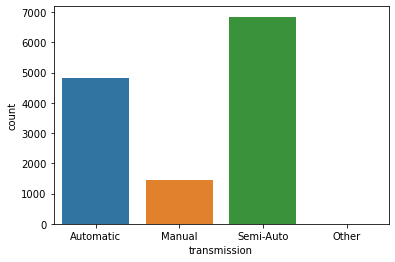

In [8]:
sns.countplot(df['transmission'])

In [9]:
df['transmission'].value_counts()

Semi-Auto    6848
Automatic    4825
Manual       1444
Other           2
Name: transmission, dtype: int64

Only 2 Other records. Deleting them shouldn't make a difference.

In [10]:
df = df[df.transmission != 'Other']
df =df[df.fuelType !='Other']

In [11]:
df['transmission'].value_counts()

Semi-Auto    6848
Automatic    4819
Manual       1444
Name: transmission, dtype: int64

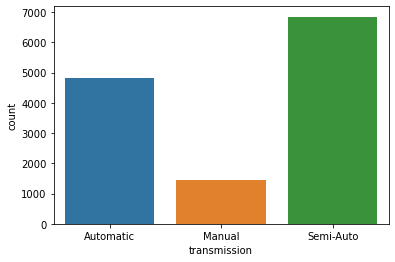

In [12]:
sns.countplot(df['transmission'])

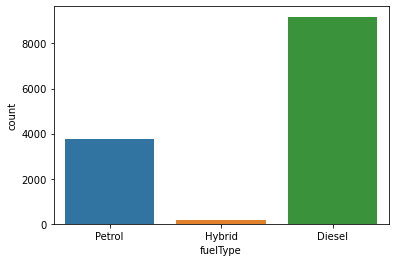

In [13]:
sns.countplot(df['fuelType'])

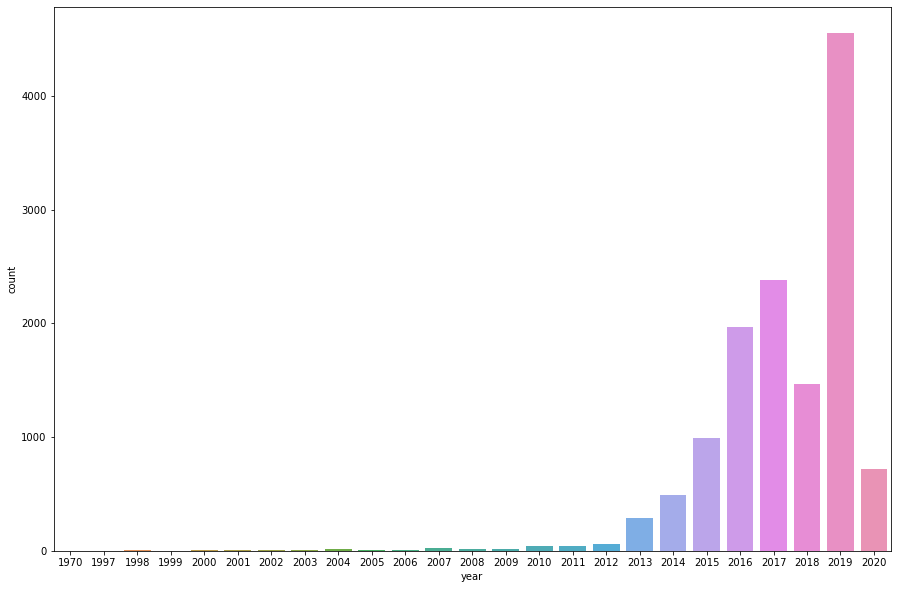

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(df['year'])

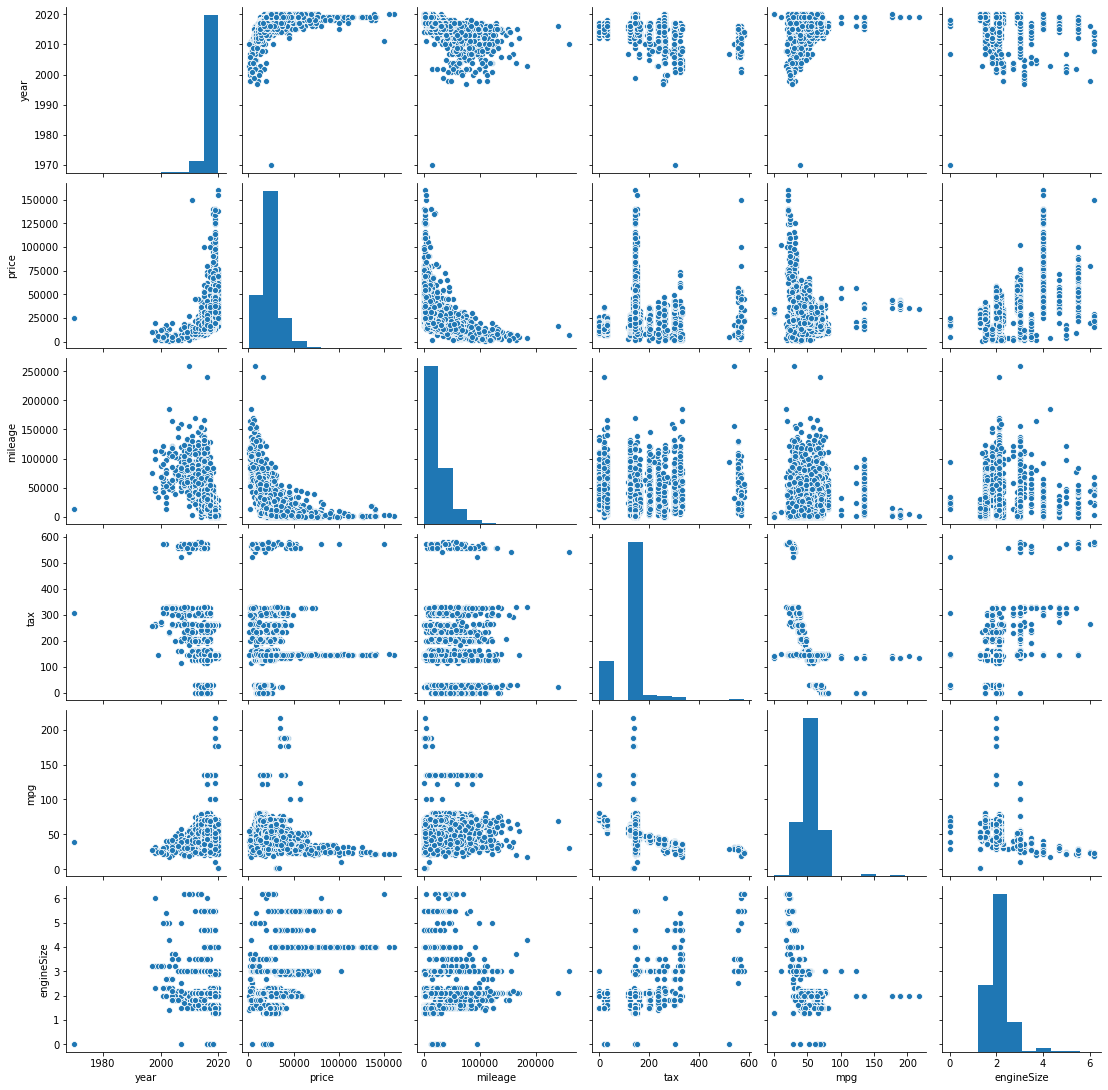

In [15]:
sns.pairplot(df)

In [16]:
df['car_age'] = 2020-df['year']
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,15
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,3
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,4
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,4
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,4


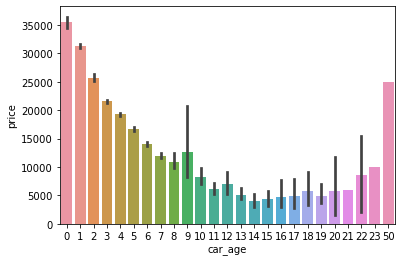

In [17]:
sns.barplot(x = 'car_age',y='price',data=df)

Ain't that amazing? Does it tell you something about the vintage cars' value?

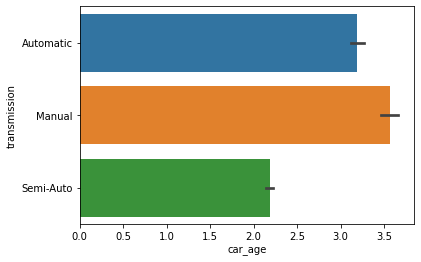

In [18]:
sns.barplot(x = 'car_age',y='transmission',data=df)

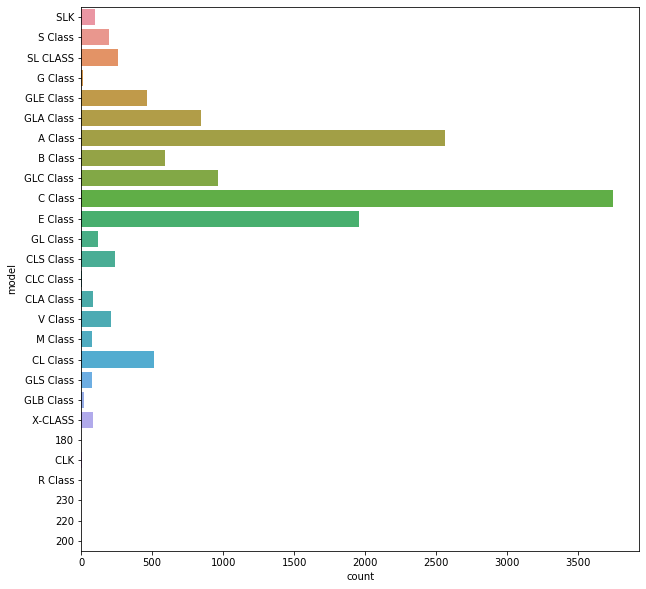

In [19]:
plt.figure(figsize =(10,10))
sns.countplot(y =df['model'])

Top 5 models

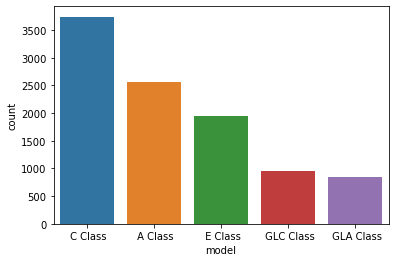

In [20]:
sns.countplot(x='model',data=df, order=df.model.value_counts().iloc[:5].index)

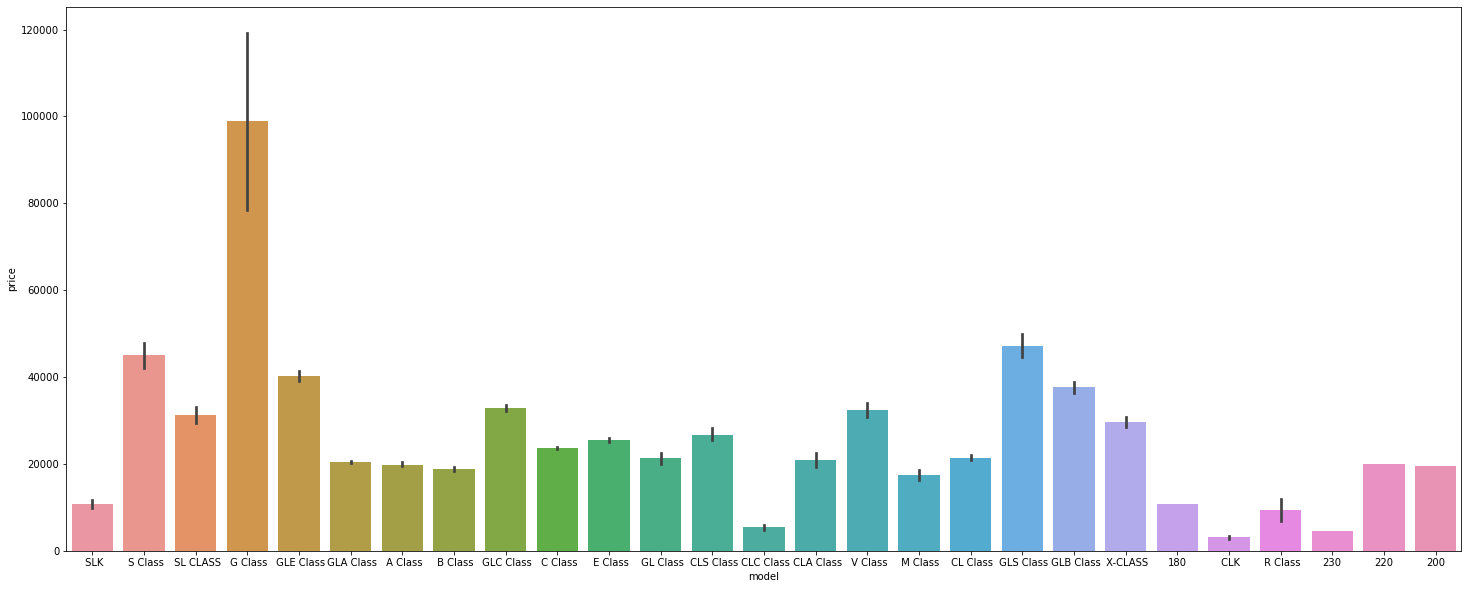

In [21]:
plt.figure(figsize =(25,10))
sns.barplot(y = 'price',x='model',data=df)

Well Well, think before getting yourself a G-Class.
Really looking forward to buy one though xD